<a href="https://colab.research.google.com/github/AlejoBSmith/TensorflowMicrocontroller/blob/main/PrimerTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Programa para hacer un "Hola mundo" de redes neuronales usando Tensorflow
#Se va a generar una onda senoidal y se va a alimentar a una red neuronal para aprender la regresión
#El primer paso es la instalación de paquetes y dependencias

!pip install tensorflow==2.0 #El signo de admiración es necesario para que se instale en el sistema. NO es un comando para Jupyter, como el resto del programa de aquí en adelante
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt #pyplot son pa manejar las gráficas como en matlab
import math

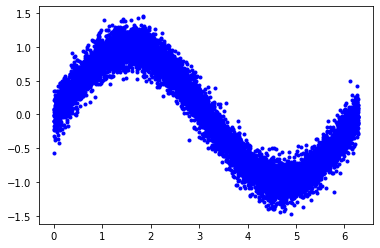

In [49]:
#Generar los datos de entrenamiento (onda senoidal)
SAMPLES=10000
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
np.random.shuffle(x_values) #Pa desordenar el vector x
y_values = np.sin(x_values) #Se una el de la librería numpy porque la de math solo trabaja con un dato

#La vida no es perfecta, siempre hay ruido en las mediciones
y_values += 0.15*np.random.randn(SAMPLES) #Primero determina de qué tamaño es el array, luego le suma los números

#Graficar pa ve cómo quedó
plt.plot(x_values, y_values, 'b.')
plt.show()

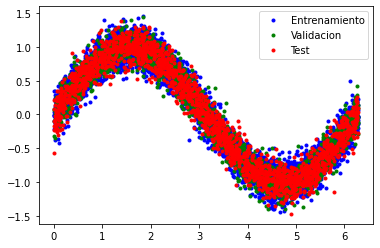

In [50]:
#Como se va a entrenar una red neuronal, hay que tener subset de entrenamiento (60%), validación (20%) y test (20%)
#El método .split corta un array en la posición que se le indica y regresa los pedazos
XEntrenamiento, XValidacion, XTest = np.split(x_values,[int(0.6*SAMPLES), int(0.8*SAMPLES)])
YEntrenamiento, YValidacion, YTest = np.split(y_values,[int(0.6*SAMPLES), int(0.8*SAMPLES)])

#Graficar los subsets pa ve
plt.plot(XEntrenamiento, YEntrenamiento, 'b.', label="Entrenamiento")
plt.plot(XValidacion, YValidacion, 'g.', label="Validacion")
plt.plot(XTest, YTest, 'r.', label="Test")
plt.legend()
plt.show()

In [59]:
#Ahora hay que definir la red neuronal
from tensorflow import keras
from tensorflow.keras import layers

model_1 = tf.keras.Sequential() #El modelo secuencial es SISO
model_1.add(layers.Dense(16, activation='sigmoid', input_shape=(1,))) #Capa intermedia, 16 neuronas, 1 entrada, ReLU
model_1.add(layers.Dense(1)) #La capa de salida
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Definir los parámetros de entrenamiento
InfoEntrenamiento = model_1.fit(XEntrenamiento, YEntrenamiento, batch_size=16, epochs=500, validation_data=(XValidacion, YValidacion))

In [ ]:
#Visualizar los resultados del entrenamiento
loss=InfoEntrenamiento.history['loss']
mae=InfoEntrenamiento.history['mae']
lossValidacion=InfoEntrenamiento.history['val_loss']
maeValidacion=InfoEntrenamiento.history['val_mae']
SKIP=10

plt.plot(loss[SKIP:], 'b.', label="Training loss")
plt.plot(lossValidacion[SKIP:], 'r.', label="Validation loss")
plt.legend()
plt.show()

In [ ]:
#Realizar predicciones con el modelo obtenido pa ve como sale
predicciones = model_1.predict(XTest)

plt.clf() #Borra la figura que ta en la memoria
plt.plot(XTest, predicciones, 'r.', label="ResultadoNN")
plt.legend()
plt.show()